In [1]:
from google.colab import files
uploaded = files.upload()

Saving penguins_size.csv to penguins_size.csv


Column: species


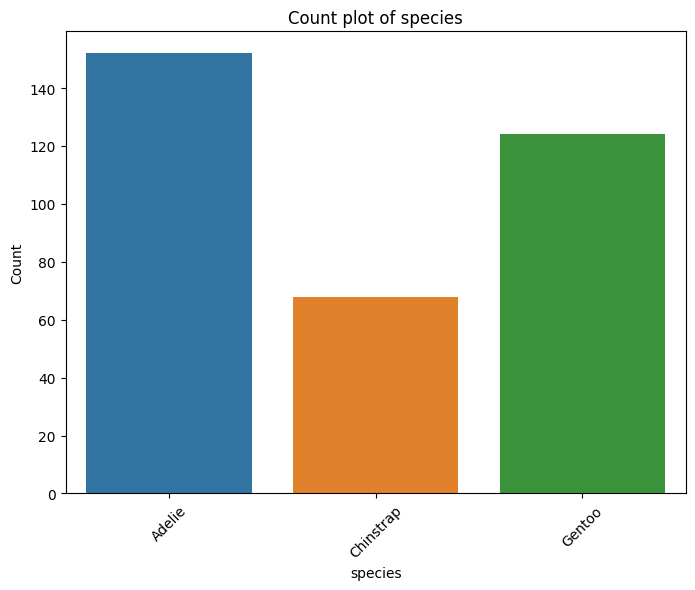

Column: island


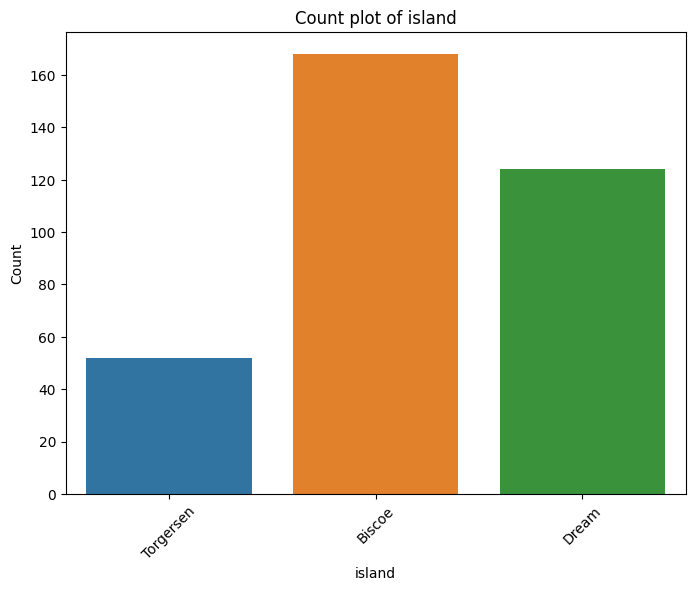

Column: culmen_length_mm


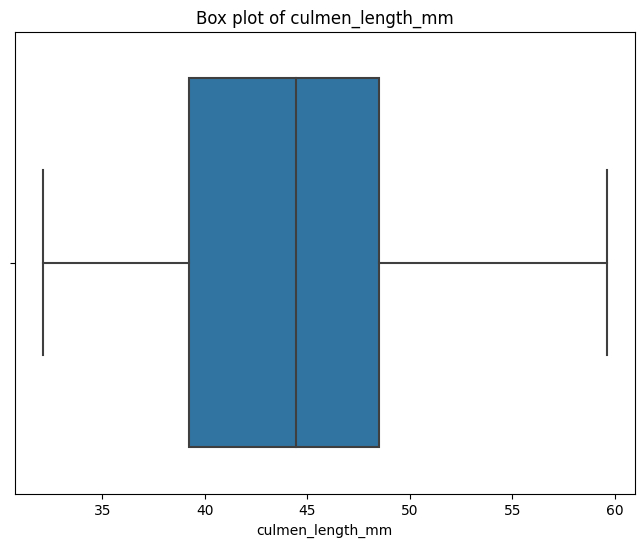

Column: culmen_depth_mm


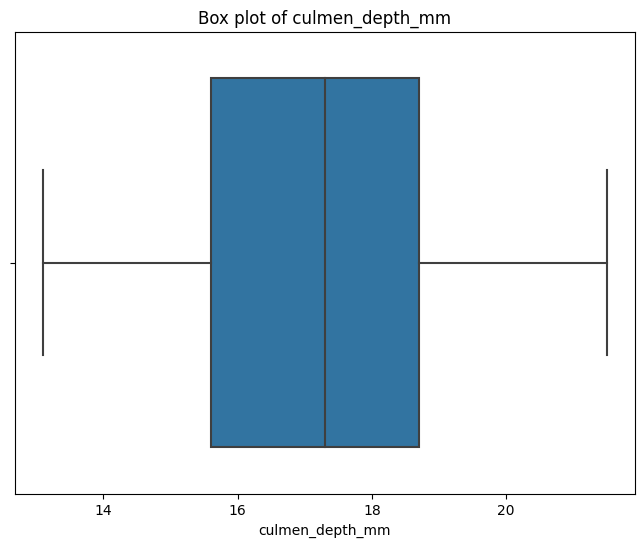

Column: flipper_length_mm


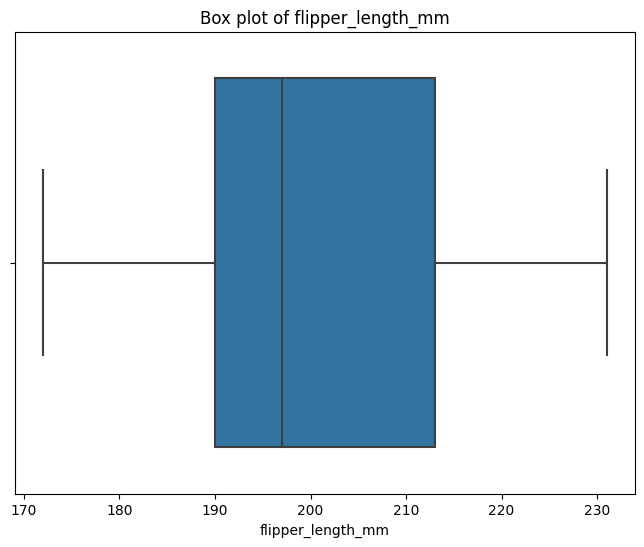

Column: body_mass_g


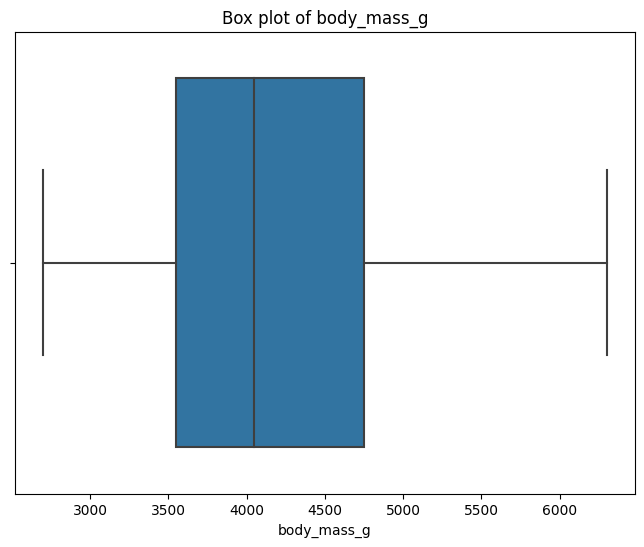

Column: sex


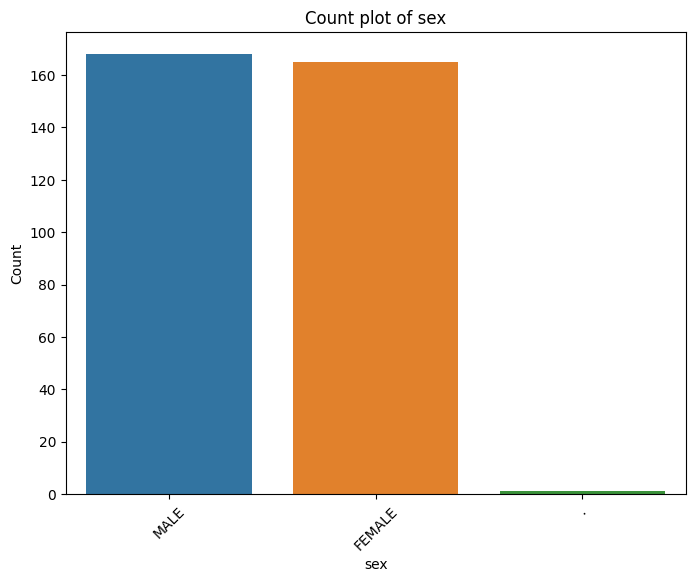

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("penguins_size.csv")
for column in ['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']:
    print(f"Column: {column}")

    if data[column].dtype == object:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=data, x=column)
        plt.title(f"Count plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=data, x=column)
        plt.title(f"Box plot of {column}")
        plt.xlabel(column)
        plt.show()

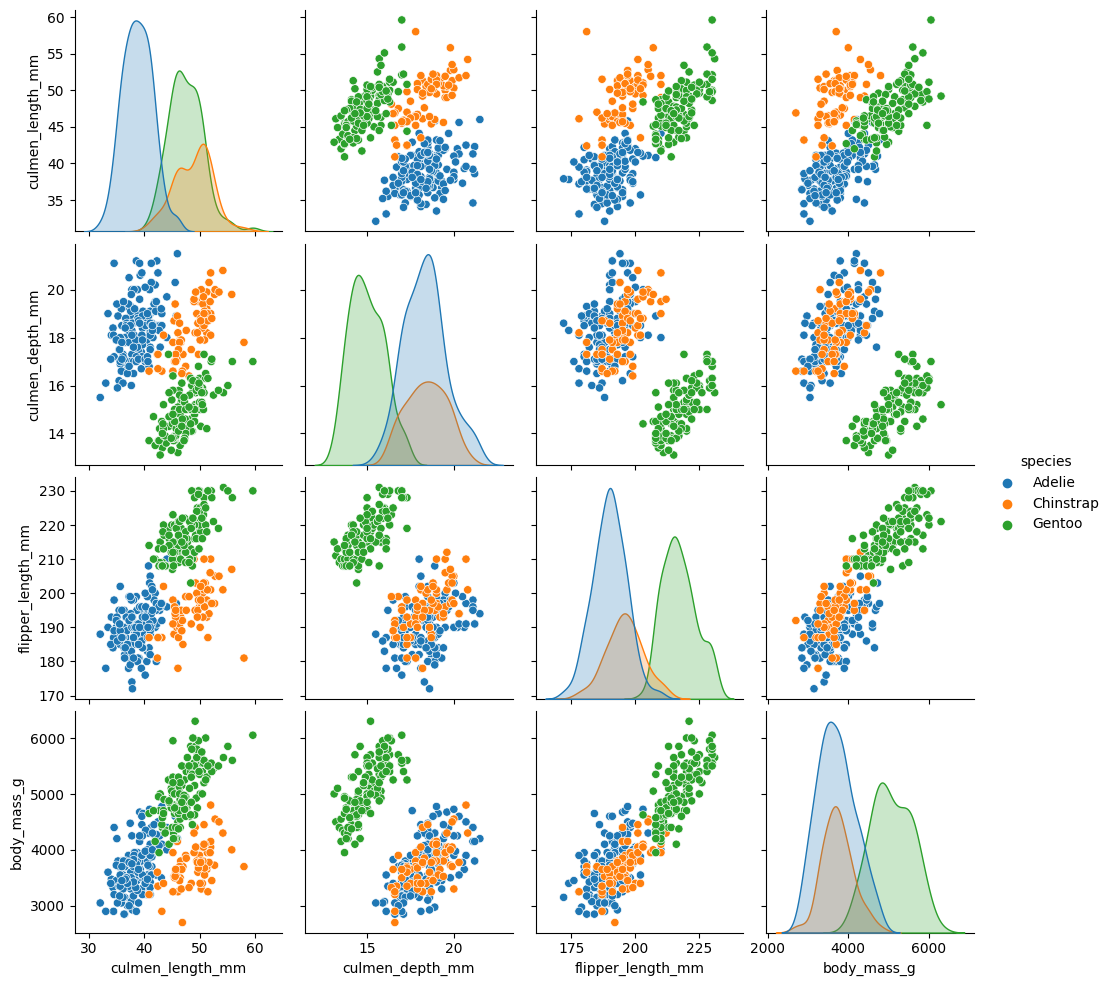

In [10]:
sns.pairplot(data, hue='species', diag_kind='kde')
plt.show()

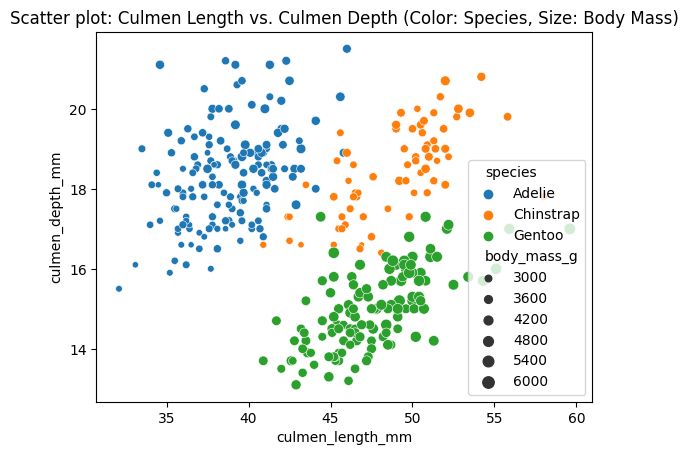

In [11]:
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species', size='body_mass_g')
plt.title('Scatter plot: Culmen Length vs. Culmen Depth (Color: Species, Size: Body Mass)')
plt.show()

In [12]:
statistics = data.describe()
print(statistics)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [13]:
missing_values = data.isnull().sum()
print(missing_values)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [15]:
def replace_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = np.nan
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in numeric_columns:
    replace_outliers(column)
categorical_columns = ['species', 'island', 'sex']
for column in categorical_columns:
    if data[column].dtype == object:
        data[column] = data[column].astype('category')
data.fillna(data.mean(), inplace=True)
print(data)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen          39.10000         18.70000         181.000000   
1    Adelie  Torgersen          39.50000         17.40000         186.000000   
2    Adelie  Torgersen          40.30000         18.00000         195.000000   
3    Adelie  Torgersen          43.92193         17.15117         200.915205   
4    Adelie  Torgersen          36.70000         19.30000         193.000000   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe          43.92193         17.15117         200.915205   
340  Gentoo     Biscoe          46.80000         14.30000         215.000000   
341  Gentoo     Biscoe          50.40000         15.70000         222.000000   
342  Gentoo     Biscoe          45.20000         14.80000         212.000000   
343  Gentoo     Biscoe          49.90000         16.10000         213.000000   

     body_mass_g     sex  
0    3750.00

<ipython-input-15-531435d5103f>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [16]:
correlation_matrix = data.corr()
target_variable = 'body_mass_g'
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)
print(correlation_with_target)

culmen_length_mm     0.595110
culmen_depth_mm     -0.471916
flipper_length_mm    0.871202
Name: body_mass_g, dtype: float64


<ipython-input-16-39bdc19f121f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [17]:
categorical_columns = []
for col in df.columns:
    if df[col].dtype == "object":
        categorical_columns.append(col)
print(categorical_columns)

['species', 'island', 'sex']


In [18]:
dependent_variable = "body_mass_g"
X = df.drop(dependent_variable, axis=1)
y = df[dependent_variable]
print(X.shape)
print(y.shape)

(344, 6)
(344,)


In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)
print(X_encoded)

  (0, 0)	1.0
  (0, 5)	1.0
  (0, 48)	1.0
  (0, 227)	1.0
  (0, 258)	1.0
  (0, 310)	1.0
  (1, 0)	1.0
  (1, 5)	1.0
  (1, 51)	1.0
  (1, 214)	1.0
  (1, 263)	1.0
  (1, 309)	1.0
  (2, 0)	1.0
  (2, 5)	1.0
  (2, 57)	1.0
  (2, 220)	1.0
  (2, 272)	1.0
  (2, 309)	1.0
  (3, 0)	1.0
  (3, 5)	1.0
  (3, 170)	1.0
  (3, 251)	1.0
  (3, 307)	1.0
  (3, 311)	1.0
  (4, 0)	1.0
  :	:
  (339, 311)	1.0
  (340, 2)	1.0
  (340, 3)	1.0
  (340, 111)	1.0
  (340, 183)	1.0
  (340, 291)	1.0
  (340, 309)	1.0
  (341, 2)	1.0
  (341, 3)	1.0
  (341, 142)	1.0
  (341, 197)	1.0
  (341, 298)	1.0
  (341, 310)	1.0
  (342, 2)	1.0
  (342, 3)	1.0
  (342, 95)	1.0
  (342, 188)	1.0
  (342, 288)	1.0
  (342, 309)	1.0
  (343, 2)	1.0
  (343, 3)	1.0
  (343, 137)	1.0
  (343, 201)	1.0
  (343, 289)	1.0
  (343, 310)	1.0


In [30]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(275, 312)
(69, 312)
